In [372]:
# santander customer satisfaction datasets from kaggle
# Dataset Link : https://www.kaggle.com/c/santander-customer-satisfaction

In [424]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Dropout,Dense,Flatten,BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.3.0


In [374]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [376]:
# Getting data from kgp talkie github
# see data inside files
# /content/Data-Files-for-Feature-Selection/santander-test.csv
# /content/Data-Files-for-Feature-Selection/santander-train.csv

!git clone https://github.com/laxmimerit/Data-Files-for-Feature-Selection.git

fatal: destination path 'Data-Files-for-Feature-Selection' already exists and is not an empty directory.


In [377]:
 data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-train.csv')
 data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [378]:
data.shape

(76020, 371)

In [379]:
# splitting train_data into x_train and y_train
# Dropping ID and making x_train,y_train/y_label
x = data.drop(labels=['ID','TARGET'],axis =1)
x.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,...,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,...,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [380]:
x.shape

(76020, 369)

In [381]:
y = train_data['TARGET']
# 0-> customers are not satisfied
# 1 -> Customers are satisfied with the bank
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [382]:
y.shape

(76020,)

In [383]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size=0.2, random_state=101,stratify = y)

In [384]:
x_train.shape,x_test.shape

((60816, 369), (15204, 369))

In [385]:
#  test_data = pd.read_csv('/content/Data-Files-for-Feature-Selection/santander-test.csv')
#  test_data.head()


In [386]:
# # Splitting test_data into x_test and y_test
# x_test = test_data.drop(labels=['ID','TARGET'],axis =1)
# y_test = test_data['TARGET']
# x_test.head()

In [387]:
# # Splitting test_data into x_test and y_test
# x_test = test_data.drop(labels=['ID'],axis =1)
# x_test.head()

In [388]:
# y_test.head()

In [389]:
# y_test.shape

### Remove Constant, Quasi Constant and Duplicate Features

In [390]:
# Removing constant and Quasi constants
# Remove rows having less than or equal to  1% variance
filter = VarianceThreshold(0.01)
x_train = filter.fit_transform(x_train)
# TO avoid prone to overfitting we use only transform instead of fit_transfom
x_test = filter.transform(x_test)



In [391]:
x_train.shape,x_test.shape

((60816, 267), (15204, 267))

In [392]:
# Now following columns./features are removed
369-272

97

In [393]:
# To remove duplicate column/features first transposing data
x_train_T = x_train.T
x_test_T = x_test.T



In [394]:

# Now creating dataframe of transposed features
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [395]:
x_train_T.shape,x_test_T.shape

((267, 60816), (267, 15204))

In [396]:
# Training dataset
# To get number of duplicated features
x_train_T.duplicated().sum()


16

In [397]:
duplicated_features = x_train_T.duplicated()


In [398]:
# Features with true value are duplicated
duplicated_features[70:90]

70     True
71    False
72     True
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
88    False
89    False
dtype: bool

In [399]:
# removing True value because all true values are duplicated
# Thus inverting values of all features
features_to_keep = [not index for index in duplicated_features]

features_to_keep[70:90]

[False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [400]:
# We are keeping only true values
x_train_unique = x_train_T[features_to_keep].T
x_train_unique.shape

(60816, 251)

In [401]:


x_train_unique.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,37,39,40,41,...,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,2.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,6.0,3.00,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61286.850000
1,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,3.00,2.34,3.00,2.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60466.290000
3,2.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,30.00,1.92,30.00,20.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89829.990000
4,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,3.0,33.0,149.97,55.17,434.73,213.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50632.710000


In [402]:
# # Number of duplicated features
# x_test_T.duplicated().sum()

In [403]:
# # Testing datasets
# duplicated_features =x_test_T.duplicated()
# duplicated_features[70:90]

In [404]:
# features_to_keep = [not index for index in duplicated_features]
# features_to_keep[70:90]

In [405]:
# # Keeping all non duplicated features 
# # Transposing features
# x_test = x_test_T[features_to_keep].T
# x_test.shape

In [406]:
x_test_unique = x_test_T[features_to_keep].T

In [407]:
x_test.shape

(15204, 267)

In [408]:
# To reqularize model
# To make features standard deviation equals
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train_unique)
x_test = scaler.transform(x_test_unique)


In [409]:
x_train

array([[ 0.03804912, -0.63263538, -0.05260588, ..., -0.0179467 ,
        -0.02025296, -0.30626619],
       [ 0.03804912, -0.70982507, -0.05260588, ..., -0.0179467 ,
        -0.02025296,  0.00128447],
       [ 0.03804912, -0.78701476, -0.05260588, ..., -0.0179467 ,
        -0.02025296, -0.31077074],
       ...,
       [ 0.03804912,  0.06207185, -0.05260588, ..., -0.0179467 ,
        -0.02025296,  0.00128447],
       [ 0.03804912, -0.63263538, -0.05260588, ..., -0.0179467 ,
        -0.02025296, -0.24892501],
       [ 0.03804912, -0.32387661, -0.05079381, ..., -0.0179467 ,
        -0.02025296,  0.00128447]])

In [412]:
x_test

array([[ 3.80491161e-02, -8.64204457e-01, -5.26058788e-02, ...,
        -1.79467011e-02, -2.02529586e-02,  1.28447434e-03],
       [ 3.80491161e-02, -7.87014764e-01, -5.26058788e-02, ...,
        -1.79467011e-02, -2.02529586e-02, -2.75687684e-01],
       [ 3.80491161e-02,  6.20718547e-02, -5.26058788e-02, ...,
        -1.79467011e-02, -2.02529586e-02,  2.75708106e+00],
       ...,
       [ 3.80491161e-02, -7.87014764e-01, -5.26058788e-02, ...,
        -1.79467011e-02, -2.02529586e-02,  1.28447434e-03],
       [ 3.80491161e-02, -1.69497223e-01, -5.26058788e-02, ...,
        -1.79467011e-02, -2.02529586e-02,  1.28447434e-03],
       [ 3.80491161e-02,  4.48020318e-01, -5.26058788e-02, ...,
        -1.79467011e-02, -2.02529586e-02,  7.55505144e-02]])

In [411]:
x_train.shape,x_test.shape

((60816, 251), (15204, 251))

In [414]:
# Our data is 3 dimensional but neural networks accept 3 dimensional data
x_train = x_train.reshape(60816, 251,1)
x_test = x_test.reshape(15204,251,1)
x_train.shape,x_test.shape

((60816, 251, 1), (15204, 251, 1))

In [415]:
# Now we need to convert all output in the form of numpy array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [418]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [434]:
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape = (251,1)))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.3))

model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Conv1D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [435]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 249, 32)           128       
_________________________________________________________________
batch_normalization_6 (Batch (None, 249, 32)           128       
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 124, 32)           0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 124, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 122, 64)           6208      
_________________________________________________________________
batch_normalization_7 (Batch (None, 122, 64)           256       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 61, 64)           

In [436]:
model.compile(optimizer=Adam(lr=0.00005),loss='binary_crossentropy',metrics =['accuracy'])


In [437]:
history = model.fit(x_train,y_train,epochs =10,validation_data=(x_test,y_test),verbose =1)

Epoch 1/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.2314 - accuracy: 0.9516 - val_loss: 0.1838 - val_accuracy: 0.9597
Epoch 2/10
1901/1901 [==============================] - 88s 46ms/step - loss: 0.1791 - accuracy: 0.9592 - val_loss: 0.1739 - val_accuracy: 0.9601
Epoch 3/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1714 - accuracy: 0.9601 - val_loss: 0.1675 - val_accuracy: 0.9603
Epoch 4/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1677 - accuracy: 0.9604 - val_loss: 0.1688 - val_accuracy: 0.9602
Epoch 5/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1660 - accuracy: 0.9603 - val_loss: 0.1662 - val_accuracy: 0.9602
Epoch 6/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1630 - accuracy: 0.9604 - val_loss: 0.1638 - val_accuracy: 0.9600
Epoch 7/10
1901/1901 [==============================] - 89s 47ms/step - loss: 0.1619 - accuracy: 0.9604 - val_loss: 0.1654 -

In [433]:
len(y_test)

15204

In [442]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()


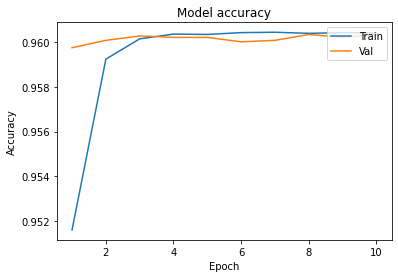

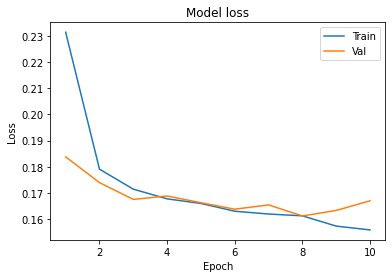

In [443]:
plot_learningCurve(history, 10)